In [1]:
pwd

'C:\\Users\\GunjanPandya\\Downloads'

In [3]:
cd C:\Users\GunjanPandya\Downloads\CSC478\newsgroups

C:\Users\GunjanPandya\Downloads\CSC478\newsgroups


In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]
For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn or other external libraries other than Pandas, NumPy, standard Python libraries, and Matplotlib (if you would like to add some visualizations to your answers.]

In [211]:
# Loading the data

train_data = pd.read_table('trainMatrixModified.txt',header=None)

In [212]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [213]:
train_data.shape

(5500, 800)

In [214]:
test_data = pd.read_table('testMatrixModified.txt',header=None)

In [215]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
test_data.shape

(5500, 200)

In [217]:
terms = pd.read_table('modifiedterms.txt',header=None)

In [218]:
terms.head()

,0
0,david
1,rex
2,wood
3,subject
4,call


In [219]:
terms.shape

(5500, 1)

In [220]:
train_classes = pd.read_table('trainClasses.txt',header=None)

In [221]:
train_classes.head()

,0,1
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [237]:
train_labels = train_classes.drop(train_classes.columns[0], axis=1)
train_labels.head()

,1
0,0
1,1
2,0
3,1
4,0


In [233]:
test_classes = pd.read_table('testClasses.txt',header=None)

In [234]:
test_classes.head()

,0,1
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1


In [236]:
test_labels = test_classes.drop(test_classes.columns[0], axis=1)
test_labels

,1
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [239]:
#converting from TD to DT matrix

DT_train = train_data.T
DT_test = test_data.T

In [240]:
DT_train

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [419]:
#Taking terms and Analyze term frequency by forming a dictionary of terms and their counts in the document-term matrix

terms = np.genfromtxt("modifiedterms.txt", dtype=str)
terms[0:30]

tFreq = DT_train.sum(axis=1)

dictTF = {}
for i in range(len(tFreq)):
    dictTF[terms[i]] = tFreq[i]
print(sorted(dictTF.items()))
sorteddictTF = sorted(dictTF.values(), reverse=True)

[('00', 159.0), ('10', 254.0), ('1010', 105.0), ('125', 74.0), ('14', 100.0), ('1990', 73.0), ('1991', 159.0), ('1992', 23.0), ('1993', 80.0), ('1st', 67.0), ('20', 32.0), ('21', 61.0), ('25', 136.0), ('2nd', 24.0), ('30', 59.0), ('4324219', 24.0), ('50', 78.0), ('5000', 286.0), ('63', 44.0), ('635', 42.0), ('705', 78.0), ('89', 204.0), ('919', 113.0), ('999', 32.0), ('abc', 172.0), ('abl', 73.0), ('accept', 195.0), ('access', 53.0), ('act', 168.0), ('activ', 107.0), ('actual', 485.0), ('adam', 81.0), ('add', 205.0), ('addit', 53.0), ('address', 31.0), ('admit', 81.0), ('admittedli', 202.0), ('advanc', 125.0), ('advantag', 45.0), ('advic', 75.0), ('afternoon', 102.0), ('ago', 78.0), ('allstar', 47.0), ('altern', 2.0), ('amount', 330.0), ('analyst', 51.0), ('anderson', 99.0), ('andrewcmuedu', 28.0), ('angel', 253.0), ('angelo', 72.0), ('announc', 48.0), ('anonym', 28.0), ('anybodi', 89.0), ('anymor', 89.0), ('anywai', 792.0), ('app', 50.0), ('appear', 214.0), ('appropri', 74.0), ('archi

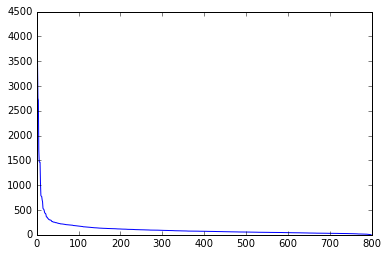

In [420]:
plt.plot(sorteddictTF)
plt.show()

# a. Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [432]:
DT_train = np.array(DT_train)
DT_test = np.array(DT_test)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [468]:
def knn_search(x, D, L, K, measure):
    """ find K nearest neighbours of data among D """
    if measure == 0:
        # euclidean distances from the other points
        inX = x
        diffMat = np.tile(inX, (D.shape[0],1)) - D
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        dists = sqDistances**0.5
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    #print(dists)
    idx = np.argsort(dists) # sorting
    #print(idx[:K])
    # return the indexes of K nearest neighbours
    neigh_labels = L[idx[:K]]
    class0 = 0
    class1 = 0
    for index in neigh_labels:
        #print(L[index])
        if L[index] == 0:
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        if class0 > class1:
            predicted_class = 0
        else:
            predicted_class = 1
    #print("The " + str(K) + " Nearest Neighbours are:" + str(idx[:K]))
    #print("The predicted class is: " + str(predicted_class))
    return idx[:K], predicted_class

I just thought of printing it as its same as returning but didn't wanted to lose any grades for printing and not returning the values as the problem said it should return, so commented printing and just returning values.

Trying a few vectors from the test data and the results.

In [469]:
neigh_idx, predicted_class = knn_search(DT_test[0], DT_train, train_labels, 5, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 667 152 427]
The predicted class is: 1


In [470]:
neigh_idx, predicted_class = knn_search(DT_test[0], DT_train, train_labels, 5, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 703 266 510]
The predicted class is: 1


In [471]:
neigh_idx, predicted_class = knn_search(DT_test[1], DT_train, train_labels, 9, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[382 775 163 587 550 127 485 651 767]
The predicted class is: 0


In [472]:
neigh_idx, predicted_class = knn_search(DT_test[1], DT_train, train_labels, 9, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[798 554 757 224  38 119 711 398 608]
The predicted class is: 0


In [473]:
neigh_idx, predicted_class = knn_search(DT_test[99], DT_train, train_labels, 5, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[255 405 556 744 170]
The predicted class is: 1


In [474]:
neigh_idx, predicted_class = knn_search(DT_test[99], DT_train, train_labels, 5, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[744 405 556 170  49]
The predicted class is: 1


In [475]:
neigh_idx, predicted_class = knn_search(DT_test[199], DT_train, train_labels, 15, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[322 664  14 145 440 792 232 254 546  52   5 246 203 618  73]
The predicted class is: 1


In [476]:
neigh_idx, predicted_class = knn_search(DT_test[199], DT_train, train_labels, 15, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[798 757 224  38 119 711 398  69 751 342  53 644 706 551 464]
The predicted class is: 0


So looking at the results above in one case which is the last one we can see different predictions for Euclidean and Cosine distance/similarity measures. If we look at the test labels here Cosine similarity (measure=1) results into correct prediction for that particular test vector.

# b. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [496]:
def accuracy(x, D, train_L, test_L, K, measure):
    count = 0
    correct = 0
    for i in range(x.shape[0]):
        #Use the first i rows of the testing data, one-by-one, in the knn function
        count += 1
        neigh_idx, predicted_class = knn_search(x[i,:], D, train_L, K, measure)
        #If the two classes don't match, add 1 to the error count
        if (predicted_class == test_L[i]):
            correct += 1
    accuracypercent = (correct/count)*100
    print("Accuracy is: " + str(accuracypercent) + "%")
    return accuracypercent

In [482]:
accuracypercent = accuracy(DT_test, DT_train, train_labels, test_labels, 5, 0)

163
200
Accuracy is: 81.5%


# c. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [517]:
import matplotlib.pyplot as pyplot
def plot_accuracy(x, D, train_L, test_L):
    i = 1
    accEuc = {}
    accCos = {}
    for i in range(20):
        i += 1
        accEuc[i] = accuracy(x, D, train_L, test_L, i, 0)
        #print(accEuc)
        accCos[i] = accuracy(x, D, train_L, test_L, i, 1)
        #print(accCos)
    df_toPlotEuc = pd.DataFrame(list(accEuc.items()))
    df_toPlotCos = pd.DataFrame(list(accCos.items()))
    plt.plot( df_toPlotEuc[0], df_toPlotEuc[1], 'r^--', label="Eucliudean")
    plt.plot( df_toPlotCos[0], df_toPlotCos[1], 'bs-', label="Cosine")
    plt.xlabel("Number of Neighbours")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Comparison For k-Nearest Neighbours")
    plt.legend(loc="best")
    plt.show()
   

Accuracy is: 78.0%
{1: 78.0}
Accuracy is: 98.5%
{1: 98.5}
Accuracy is: 67.5%
{1: 78.0, 2: 67.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0}
Accuracy is: 81.0%
{1: 78.0, 2: 67.5, 3: 81.0}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0}
Accuracy is: 77.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0}
Accuracy is: 81.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0}
Accuracy is: 83.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5}
Accuracy is: 76.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0}
Accuracy is: 80.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5, 8: 80.0}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0, 8: 97.5}
Accuracy is: 75.0%
{1: 78.0, 2: 

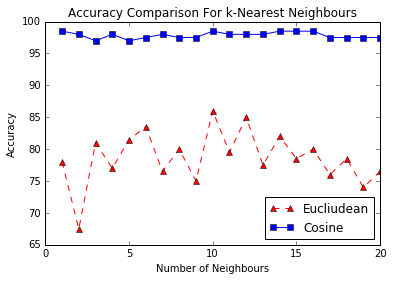

In [518]:
plot_accuracy(DT_test, DT_train, train_labels, test_labels)

So from the graph above we can see that the performance of the classifier is much better with Cosine similarity as similarity measure as compared to when we use Euclidean distance. 

The maximum accuracy achieved using Cosine similarity is 98.5% which is for k = 1, 10, 14, 15, 16.

The maximum accuracy achieved using Euclidean distance is 86% which is for k = 10.

# d. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [555]:
#Loading term-document data
train_data = pd.read_table('trainMatrixModified.txt',header=None)
test_data = pd.read_table('testMatrixModified.txt',header=None)

TD_train = np.array(train_data)
TD_test = np.array(test_data)

numTerms_train = len(TD_train[:,0])
NDocs_train = len(TD_train[0])
print(numTerms_train)
print(NDocs_train)

numTerms_test = len(TD_test[:,0])
NDocs_test = len(TD_test[0])
print(numTerms_test)
print(NDocs_test)

#Finding document frequencies
DF_train = np.array([(TD_train!=0).sum(1)]).T
DF_test = np.array([(TD_test!=0).sum(1)]).T

5500
800
5500
200


In [556]:
print(DF_train)

[[50]
 [ 7]
 [10]
 ..., 
 [ 2]
 [ 2]
 [ 2]]


In [557]:
print(DF_test)

[[15]
 [ 0]
 [ 1]
 ..., 
 [ 1]
 [ 1]
 [ 1]]


In [558]:
#Create a matrix with all entries = NDocs
NMatrix_train = np.ones(np.shape(TD_train), dtype=float)*NDocs_train
print(NMatrix_train)

NMatrix_test = np.ones(np.shape(TD_test), dtype=float)*NDocs_test
print(NMatrix_test)

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]
[[ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 ..., 
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]]


In [559]:
#Converting into IDF Values

IDF_train = np.log2(np.divide(NMatrix_train, DF_train))
print(IDF_train)

IDF_test = np.log2(np.divide(NMatrix_test, DF_test))
print(IDF_test)

[[ 4.          4.          4.         ...,  4.          4.          4.        ]
 [ 6.83650127  6.83650127  6.83650127 ...,  6.83650127  6.83650127
   6.83650127]
 [ 6.32192809  6.32192809  6.32192809 ...,  6.32192809  6.32192809
   6.32192809]
 ..., 
 [ 8.64385619  8.64385619  8.64385619 ...,  8.64385619  8.64385619
   8.64385619]
 [ 8.64385619  8.64385619  8.64385619 ...,  8.64385619  8.64385619
   8.64385619]
 [ 8.64385619  8.64385619  8.64385619 ...,  8.64385619  8.64385619
   8.64385619]]
[[ 3.73696559  3.73696559  3.73696559 ...,  3.73696559  3.73696559
   3.73696559]
 [        inf         inf         inf ...,         inf         inf
          inf]
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 ..., 
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]]


In [561]:
#Computing TFxIDF values for each document-term entry

TF_IDF_train = TD_train*IDF_train
print(TF_IDF_train)

TF_IDF_test = TD_test*IDF_test
print(TF_IDF_test)

[[  8.           0.           0.         ...,   0.           0.           0.        ]
 [ 13.67300254   0.           0.         ...,   0.           0.           0.        ]
 [ 12.64385619   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 0.          0.          3.73696559 ...,  0.          0.          0.        ]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.         

Accuracy is: 78.0%
{1: 78.0}
Accuracy is: 98.5%
{1: 98.5}
Accuracy is: 67.5%
{1: 78.0, 2: 67.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0}
Accuracy is: 81.0%
{1: 78.0, 2: 67.5, 3: 81.0}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0}
Accuracy is: 77.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0}
Accuracy is: 81.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0}
Accuracy is: 83.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5}
Accuracy is: 76.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0}
Accuracy is: 80.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5, 8: 80.0}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0, 8: 97.5}
Accuracy is: 75.0%
{1: 78.0, 2: 

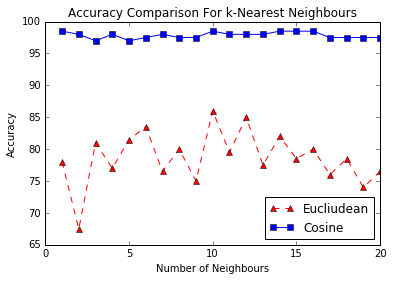

In [564]:
plot_accuracy(TF_IDF_test, TF_IDF_train, train_labels, test_labels)

# e. Create a classifier based on the Rocchio Method adapted for text categorization. Your classifier should take as input the training data matrix, the training labels, and the instance to be classified. It should compute the prototype vectors for each of the categories and measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class and include the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

# 2. Classification using scikit-learn [Dataset: bank_data.csv]
For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

Your tasks in this problem are the following:

# a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [565]:
pwd

'C:\\Users\\GunjanPandya\\Downloads\\CSC478\\newsgroups'

In [566]:
cd C:\Users\GunjanPandya\Downloads\CSC478

C:\Users\GunjanPandya\Downloads\CSC478


In [567]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [574]:
df_bank_data = pd.read_csv('bank_data.csv',index_col=0)

#We will not need ID anyways for classification, so rather then dropping it before converting it to CSV, storing it as IndexError

In [575]:
df_bank_data.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


In [584]:
df_bank_data.shape

(600, 11)

Let's separate the target attribute and the attributes used for model training

In [577]:
df_records = df_bank_data[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
df_records.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [573]:
df_target = df_bank_data.pep
df_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

Next, we use Pandas "get_dummies" function to create dummy variables.

In [578]:
data_ssf = pd.get_dummies(df_records, columns = ["gender","region","married","car","savings_acct","current_acct","mortgage"])

In [579]:
data_ssf.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
ID12102,40,30085.10,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
ID12103,51,16575.40,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12104,23,20375.40,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12105,57,50576.30,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12106,57,37869.60,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12107,22,8877.07,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12108,58,24946.60,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12109,37,25304.30,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation".

In [581]:
from sklearn.cross_validation import train_test_split

df_train, df_test, df_target_train, df_target_test = train_test_split(data_ssf, df_target, test_size=0.2, random_state=33)

In [583]:
df_train.shape

(480, 19)

In [585]:
df_test.shape

(120, 19)

In [586]:
df_target_train.shape

(480,)

In [588]:
df_target_test.shape

(120,)

# b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

Normalizing the data to be used in the KNN classifier.

In [599]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(df_train)
df_train_norm = min_max_scaler.transform(df_train)

min_max_scaler = preprocessing.MinMaxScaler().fit(df_test)
df_test_norm = min_max_scaler.transform(df_test)

In [600]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
df_train_norm[0:5]

array([[ 0.57,  0.46,  0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.8 ,  0.78,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.14,  0.16,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.35,  0.18,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.33,  0.18,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

In [601]:
df_test_norm[0:5]

array([[ 0.29,  0.15,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.84,  0.45,  0.33,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.88,  0.67,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.71,  0.8 ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.96,  0.6 ,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

In [603]:
#k-nearest neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

bank_data_knn = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [606]:
df_target_predict = bank_data_knn.predict(df_test_norm)
df_target_predict

array(['YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'], dtype=object)

Classification report

In [607]:
from sklearn.metrics import classification_report

print(classification_report(df_target_test, df_target_predict))

             precision    recall  f1-score   support

         NO       0.65      0.77      0.71        66
        YES       0.64      0.50      0.56        54

avg / total       0.65      0.65      0.64       120



Confusion matrix - And its visualization using matplotlib

[[51 15]
 [27 27]]


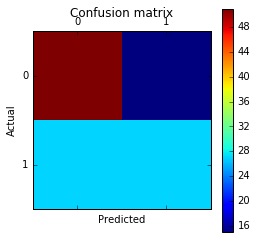

In [612]:
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)

print(knn_confusion_matrix)

plt.matshow(knn_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Average Accuracy Score (over test data)

In [610]:
bank_data_knn.score(df_test_norm, df_target_test)

0.65000000000000002

Average Accuracy Score (over training data)

In [611]:
bank_data_knn.score(df_train_norm, df_target_train)

0.75624999999999998

In [629]:
#Changing the kNN parameters (k, metric, weights)

bank_data_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.71      0.69        66
        YES       0.62      0.57      0.60        54

avg / total       0.65      0.65      0.65       120

[[47 19]
 [23 31]]
Accuracy on test data:0.65
Accuracy on training data:1.0


In [628]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.73      0.70        66
        YES       0.62      0.56      0.59        54

avg / total       0.65      0.65      0.65       120

[[48 18]
 [24 30]]
Accuracy on test data:0.65
Accuracy on training data:1.0


In [644]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.68      0.70      0.69        66
        YES       0.62      0.59      0.60        54

avg / total       0.65      0.65      0.65       120

[[46 20]
 [22 32]]
Accuracy on test data:0.65
Accuracy on training data:1.0


In [631]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.68      0.71      0.70        66
        YES       0.63      0.59      0.61        54

avg / total       0.66      0.66      0.66       120

[[47 19]
 [22 32]]
Accuracy on test data:0.658333333333
Accuracy on training data:1.0


In [634]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.64      0.67      0.65        66
        YES       0.57      0.54      0.55        54

avg / total       0.61      0.61      0.61       120

[[44 22]
 [25 29]]
Accuracy on test data:0.608333333333
Accuracy on training data:1.0


In [633]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.64      0.67      0.65        66
        YES       0.57      0.54      0.55        54

avg / total       0.61      0.61      0.61       120

[[44 22]
 [25 29]]
Accuracy on test data:0.608333333333
Accuracy on training data:1.0


Changing the value of k in the model parameters we can see that the maximum accuracy we achieve on test data is 65.08% or 0.6583 for k = 11 and then it starts decreasing if we increase the value of k.

Changing the weights parameter.

In [643]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.70      0.68        66
        YES       0.61      0.57      0.59        54

avg / total       0.64      0.64      0.64       120

[[46 20]
 [23 31]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.783333333333


In [641]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.69      0.73      0.71        66
        YES       0.64      0.59      0.62        54

avg / total       0.67      0.67      0.67       120

[[48 18]
 [22 32]]
Accuracy on test data:0.666666666667
Accuracy on training data:0.777083333333


In [637]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.69      0.77      0.73        66
        YES       0.67      0.57      0.62        54

avg / total       0.68      0.68      0.68       120

[[51 15]
 [23 31]]
Accuracy on test data:0.683333333333
Accuracy on training data:0.770833333333


In [638]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.66      0.71      0.69        66
        YES       0.61      0.56      0.58        54

avg / total       0.64      0.64      0.64       120

[[47 19]
 [24 30]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.770833333333


In [639]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.66      0.71      0.69        66
        YES       0.61      0.56      0.58        54

avg / total       0.64      0.64      0.64       120

[[47 19]
 [24 30]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.745833333333


In [640]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.68      0.68        66
        YES       0.60      0.59      0.60        54

avg / total       0.64      0.64      0.64       120

[[45 21]
 [22 32]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.735416666667


Changing the value of weights in the model parameters we can see that the maximum accuracy we achieve on test data is 68.33% or 0.6833 for k = 9 and then it starts decreasing. Also changing the weights to "uniform" improves precision.

Changing the metric parameter.